In [17]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 11.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp311-cp311-macosx_11_0_arm64.whl size=392870 sha256=2a1fc7495797d002e50c0ce9f360b440dfc9efdb01a34b1de15b4b257730812a
  Stored in directory: /Users/floyd/Library/Caches/pip/wheels/9c/cb/bd/4f19f79eee4fe83d1303d9be845bf9b07507dcac5439fa30ba
Successfully built scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

/Users/floyd/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data_dir = "crocker_results"
file_list = sorted([f for f in os.listdir(data_dir) if f.endswith(".npy")])
vectorized_data = []

for fname in file_list:
    matrix = np.load(os.path.join(data_dir, fname))
    vector = matrix.flatten()
    vectorized_data.append(vector)

X = np.vstack(vectorized_data)
print("Shape of X:", X.shape)

Shape of X: (100, 16320)


In [4]:
filenames = [os.path.splitext(f)[0] for f in file_list]

In [5]:
#PCA reduce
pca = PCA(n_components=50, random_state=1)
X_reduced = pca.fit_transform(X)

In [16]:
pca.explained_variance_ratio_[:5]

array([0.4890492 , 0.39535286, 0.06725315, 0.02215769, 0.01172656])

In [6]:
#K-mean
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_reduced)

cluster_df = pd.DataFrame({
    'field': filenames,
    'cluster': labels
})

print(cluster_df.head())
print(cluster_df.sort_values(by='cluster'))

                                    field  cluster
0  Accounting Auditing and Accountability        2
1                   Aerospace Engineering        2
2              Agricultural Biotechnology        7
3    Agriculture Land and Farm Management        2
4                    Analytical Chemistry        3
                                       field  cluster
65                        Medical Physiology        0
33                                 Dentistry        0
16                    Biomedical Engineering        0
66      Medicinal and Biomolecular Chemistry        0
63     Medical Biochemistry and Metabolomics        0
..                                       ...      ...
78                 Other Biological Sciences        7
53                  Industrial Biotechnology        7
83         Other Medical and Health Sciences        7
56       Journalism and Professional Writing        7
82  Other Information and Computing Sciences        7

[100 rows x 2 columns]


In [7]:
cluster_4_fields = cluster_df[cluster_df['cluster'] == 4]
cluster_4_fields

,field,cluster
7,Applied Economics,4
43,Environmental Science and Management,4
94,Soil Sciences,4


In [8]:
bcsoil = np.load(os.path.join(data_dir, "Soil Sciences.npy"))
bcmathphy = np.load(os.path.join(data_dir, "Mathematical Physics.npy"))

In [9]:
years = vals = np.linspace(0, 1, 102).tolist()
inv_counts = vals = 1 / np.arange(40, 0, -1)

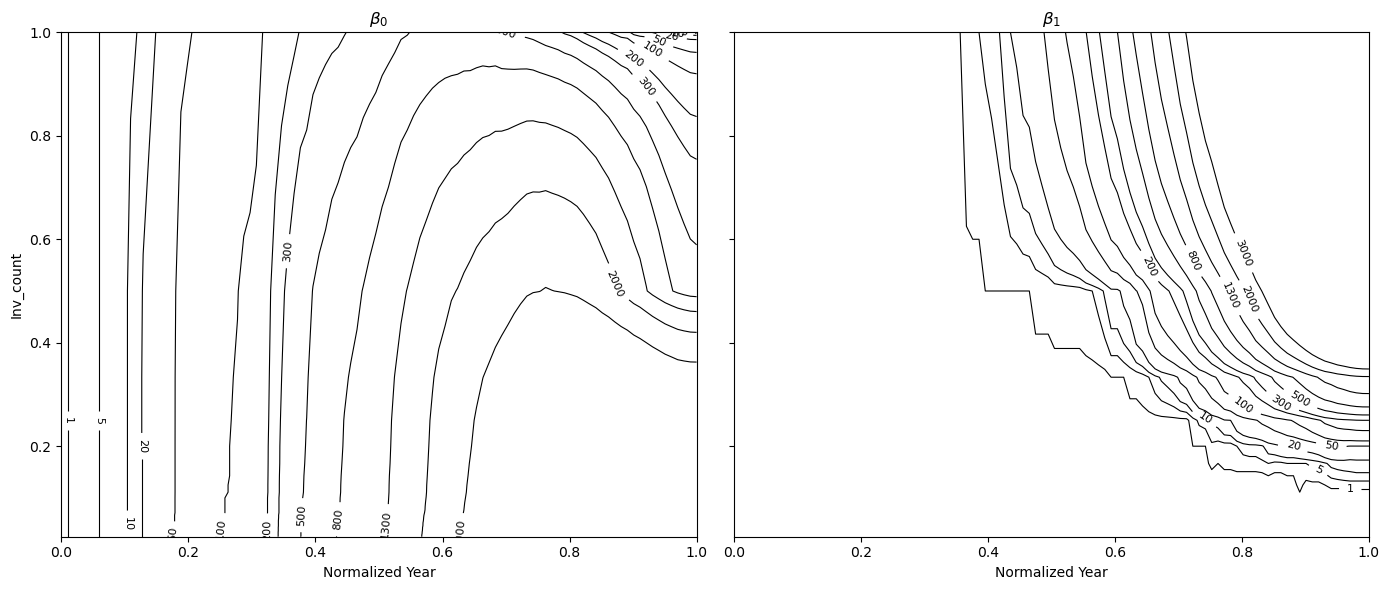

In [10]:
X, Y = np.meshgrid(years, inv_counts)
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for dim, ax in enumerate(axs):
    Z = bcsoil[:, :, dim].T
    cp = ax.contour(X, Y, Z, levels=[1, 5, 10, 20, 50, 100, 200,300,500,800,1300,2000,3000], colors='black', linewidths=0.8)
    ax.clabel(cp, inline=True, fontsize=8)
    ax.set_xlabel("Normalized Year")
    ax.set_title(f"$\\beta_{dim}$")

axs[0].set_ylabel("Inv_count")
plt.tight_layout()
plt.show()

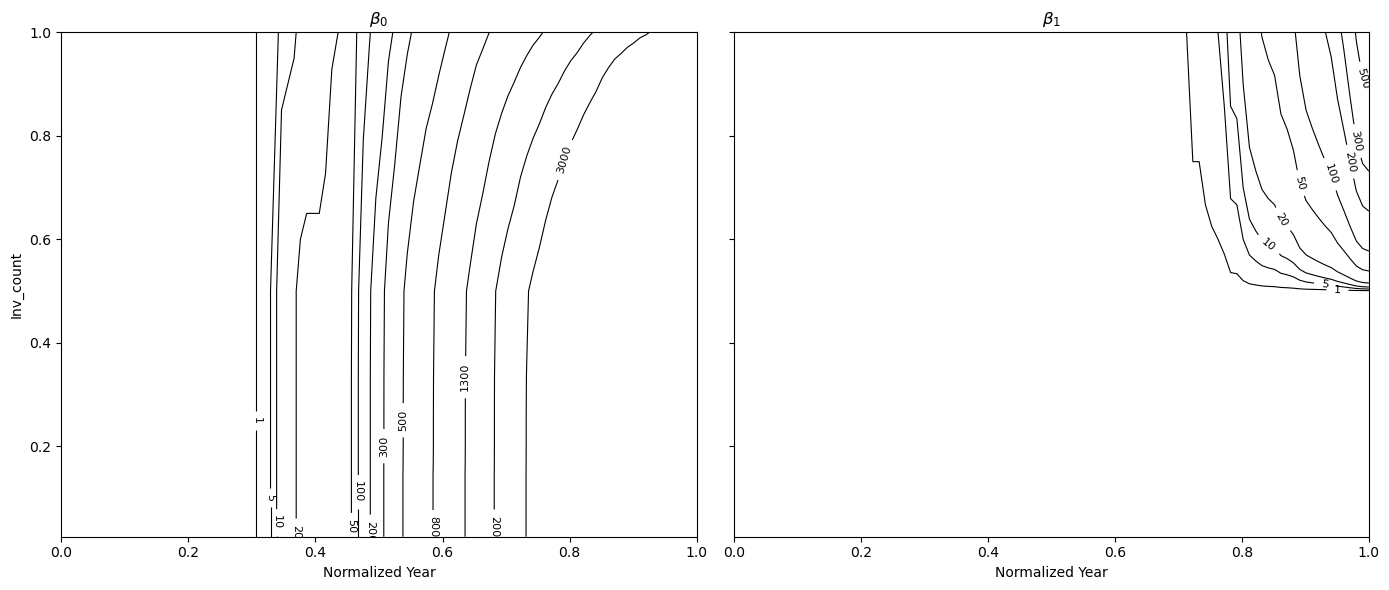

In [12]:
X, Y = np.meshgrid(years, inv_counts)
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for dim, ax in enumerate(axs):
    Z = bcmathphy[:, :, dim].T
    cp = ax.contour(X, Y, Z, levels=[1, 5, 10, 20, 50, 100, 200,300,500,800,1300,2000,3000], colors='black', linewidths=0.8)
    ax.clabel(cp, inline=True, fontsize=8)
    ax.set_xlabel("Normalized Year")
    ax.set_title(f"$\\beta_{dim}$")

axs[0].set_ylabel("Inv_count")
plt.tight_layout()
plt.show()

In [18]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 40.

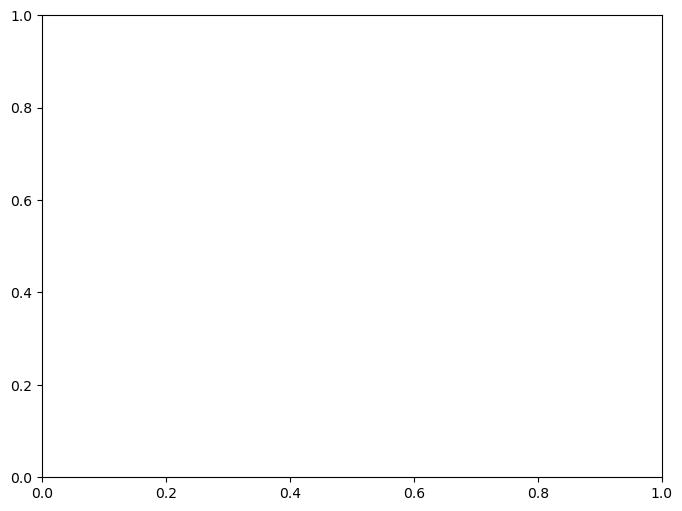

In [19]:
cmap = plt.get_cmap('tab10', n_clusters)
norm = BoundaryNorm(boundaries=range(n_clusters+1), ncolors=n_clusters)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap=cmap, norm=norm, s=60)

cbar = plt.colorbar(ScalarMappable(cmap=cmap, norm=norm), ticks=range(n_clusters))
cbar.set_label('Cluster')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
#K-medoids
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=42)
labels = kmedoids.fit_predict(X_reduced)

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 40.

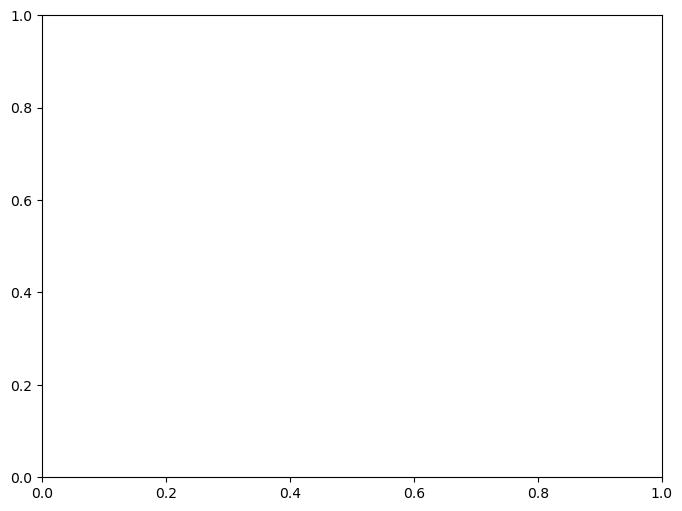

In [22]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap=cmap, norm=norm, s=60)
cbar = plt.colorbar(ScalarMappable(cmap=cmap, norm=norm), ticks=range(n_clusters))
cbar.set_label('Cluster (K-medoids)')
plt.grid(True)
plt.tight_layout()
plt.show()

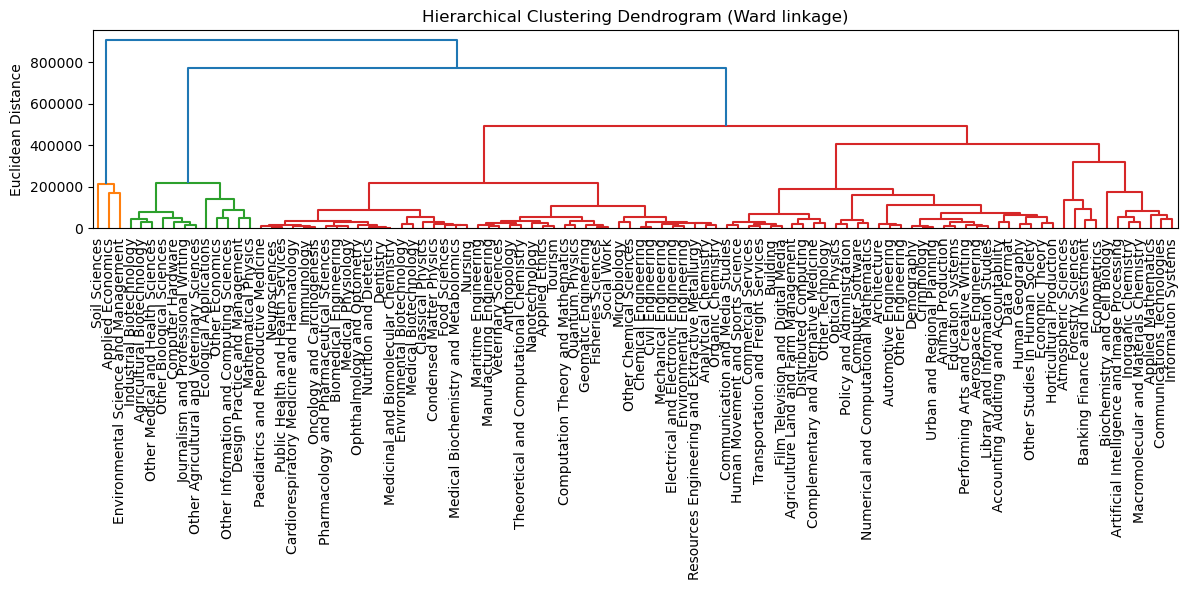

In [25]:
#Hierachical

distance_matrix = pdist(X_reduced, metric='euclidean')
Z = linkage(distance_matrix, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=filenames, 
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=None
)

plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.tight_layout()
plt.show()